In [1]:
      ################################## TASK-2##############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'Task_2.csv')

In [3]:
df.head()
df.rename({'Unnamed: 0': 'fireID'},axis=1,inplace=True)
df.drop(['District','year'],axis=1,inplace=True)
df.head()

,fireID,brightness,scan,track,confidence,bright_t31,frp,daynight,type
0,0,318.6,1.0,1.0,69,302.6,7.7,D,0
1,1,317.0,1.1,1.0,69,302.0,9.3,D,0
2,2,317.2,2.5,1.5,53,300.0,29.3,D,0
3,3,316.8,2.5,1.5,57,300.8,27.5,D,0
4,4,324.6,2.1,1.4,77,303.7,44.0,D,0


In [4]:
#frp: Fire Radiant Power(MW)
#brightness: Mid-IR temperature(K) 
#bright_t31: Long-IR temperature(K)

Text(0, 0.5, 'Radiant Power')

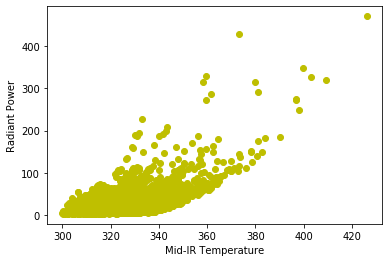

In [45]:
%matplotlib inline
plt.scatter(df['brightness'],df['frp'],color='y')
plt.xlabel('Mid-IR Temperature')
plt.ylabel('Radiant Power')

In [ ]:
# This plot is not consistent with the 'Blackbody Radiation' and is more spread over the 'Radiant' Energy rather that the 'color'.
# This quanity will not be suitable for clustering as it has narrow specturm band with respect to 'color'

Text(0, 0.5, 'Radiant Power')

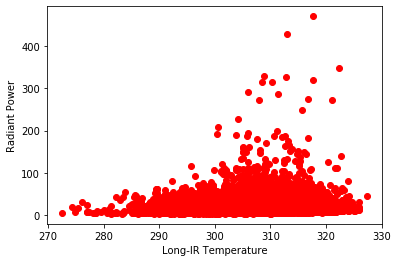

In [46]:
%matplotlib inline
plt.scatter(df['bright_t31'],df['frp'],color='r')
plt.xlabel('Long-IR Temperature')
plt.ylabel('Radiant Power')

In [ ]:
# So this plot is consistent with the 'Blackbody Radiation' for EM waves, and is more spread about the 'color' axis.
# Thus, this is a good parameter for clustering.

In [6]:
# K-Clustering: This 1st job is to find the right 'k' which is the number of cluster. We start by 'Elbow Plot' method.
# In 'Elbow Plot' we basically find the 'Within Sum of Square Error' with respect to each choosen 'k'.
# The point where we see a 'Elbow' is being formed, that 'k' we consider as the optimal no. of clusters. 
# But 'Elbow Plot' dosen't always predicts the exact 'k',we need to verify it using other methods such as 'Silhouette Clustering'. 
 
    k_range0 = range(1,20)
sse0 = []
for k in k_range0:
    km = KMeans(n_clusters=k)
    km.fit(df[['bright_t31','frp']])
    sse0.append(km.inertia_)

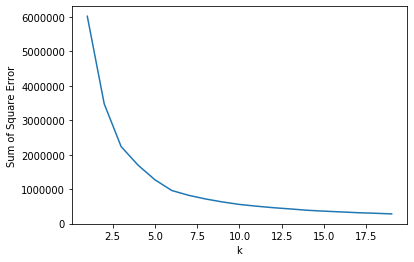

In [81]:
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.plot(k_range0,sse0)

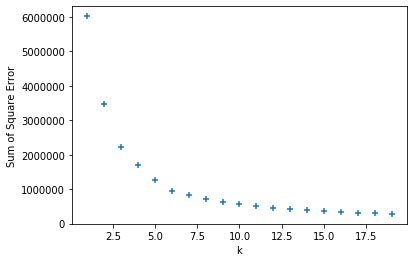

In [82]:
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.scatter(k_range0,sse0, marker='+')

In [83]:
# Here let's try for amother k_range
k_range1 = range(1,15)
sse1 = []
for k in k_range1:
    km = KMeans(n_clusters=k)
    km.fit(df[['bright_t31','frp']])
    sse1.append(km.inertia_)

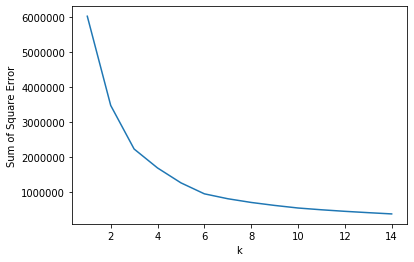

In [84]:
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.plot(k_range1,sse1)

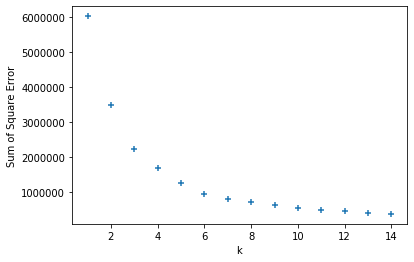

In [85]:
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.scatter(k_range1,sse1,marker='+')

In [ ]:
#  So by observing both the 'Elbow plots' we can guess that 'k' might be around 6. But to confirm it we have to perform 
# 'Silhouette clustering'.

In [10]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

In [88]:
for i in range(2,12):
    labels = cluster.KMeans(n_clusters=i, init='k-means++',random_state=200).fit(df[['bright_t31','frp']]).labels_
    print('For k={} Silhouette Score is'.format(i), (metrics.silhouette_score(df[['bright_t31','frp']], labels, metric='euclidean',sample_size=1000,random_state=200)))

For k=2 Silhouette Score is 0.7332661285724696
For k=3 Silhouette Score is 0.622409320134007
For k=4 Silhouette Score is 0.4505816913706649
For k=5 Silhouette Score is 0.38925967726330774
For k=6 Silhouette Score is 0.4039988222349656
For k=7 Silhouette Score is 0.39781174097684013
For k=8 Silhouette Score is 0.3545082951373998
For k=9 Silhouette Score is 0.35562543650522693
For k=10 Silhouette Score is 0.36923033898000074
For k=11 Silhouette Score is 0.35846227586183044


In [ ]:
# Now as the increasing Silhouette score and its trend is not certain, so'K' can't be  determined from this data. 
# Firstly we have to scale the data.
# And, secondly then instead of taking the average, we will consider the Silhouette value of each cluster.

In [7]:
# Scaling the x value
from sklearn.preprocessing import MinMaxScaler
df1 = df.copy()
scaler = MinMaxScaler()
scaler.fit(df1[['bright_t31']])
df1['bright_t31*'] = scaler.transform(df1[['bright_t31']])


In [8]:
# Scaling the y value
scaler.fit(df1[['frp']])
df1['frp*'] = scaler.transform(df1[['frp']])

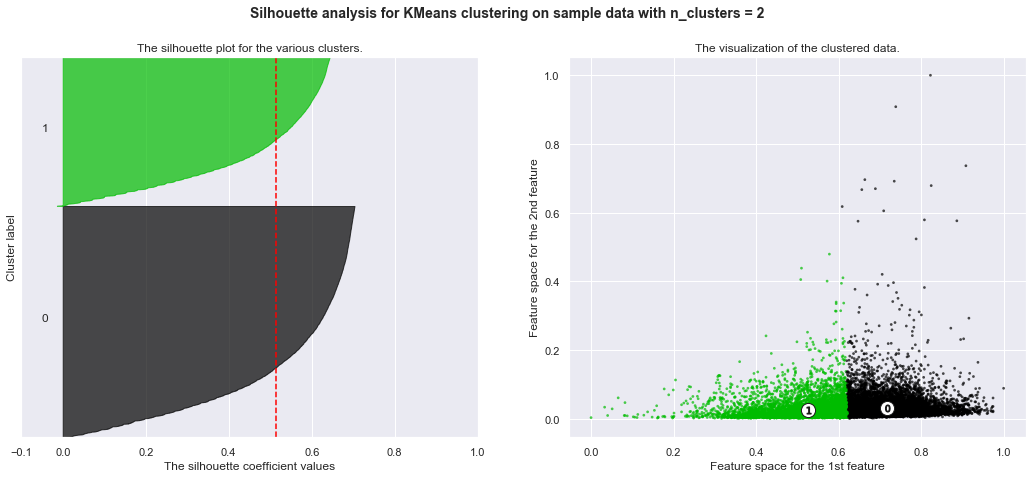

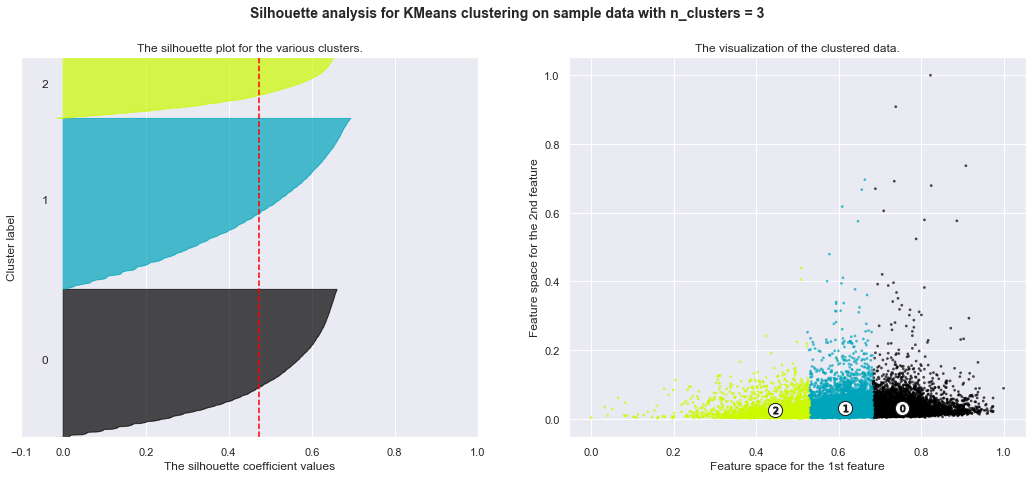

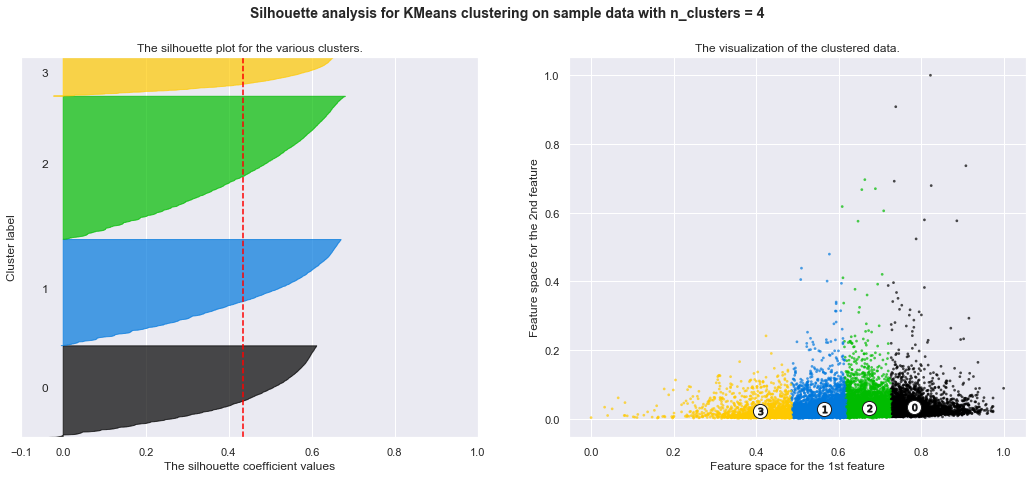

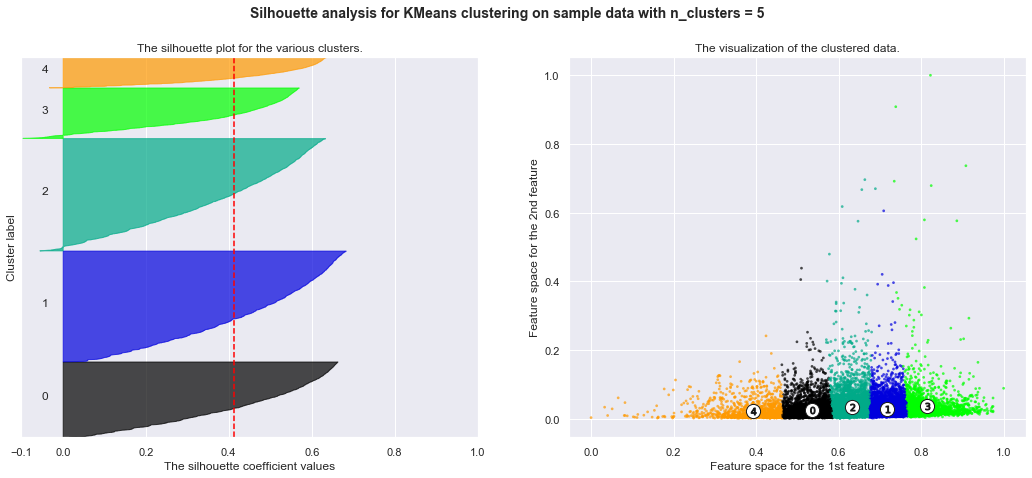

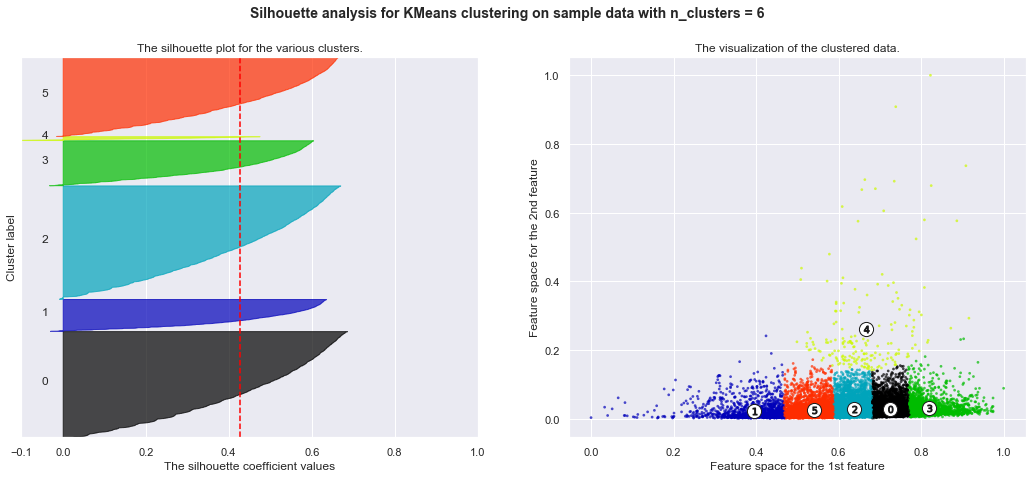

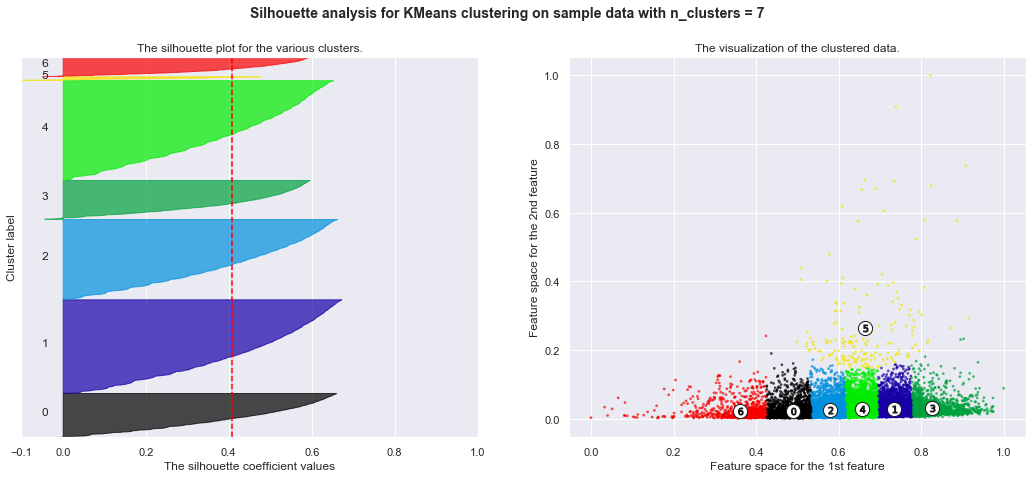

In [182]:
# Most important step to determine the 'k' value, by checking individual 'Silhouette value'

# Initialisation:
range_n_clusters = [2,3,4,5,6,7]
X = df1[['bright_t31*','frp*']]
X = X.values.tolist()
X = np.array(X)

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

    

In [202]:
# Clearly we can see that k = '3' because it has the least or almost 'zero' negetive distance/Silhouette value.
# For information negetive 'Silhouette value' value would mean the the distance between the neighboring smaller than itself.
# So, this makes k=3 as the best clustering number.


In [201]:
# To check the clusters properly in Excel
df1.to_csv('task_20.csv')

In [11]:
kmeans = cluster.KMeans(n_clusters=3, init='k-means++')
kmeans= kmeans.fit(df1[['bright_t31*','frp*']])
df1['cluster'] = kmeans.labels_

In [14]:
import seaborn as sns

In [12]:
kmeans = cluster.KMeans(n_clusters=3, init='k-means++')
kmeans= kmeans.fit(df[['bright_t31','frp']])
df['cluster1'] = kmeans.labels_

In [ ]:
# The scaling changes the plots

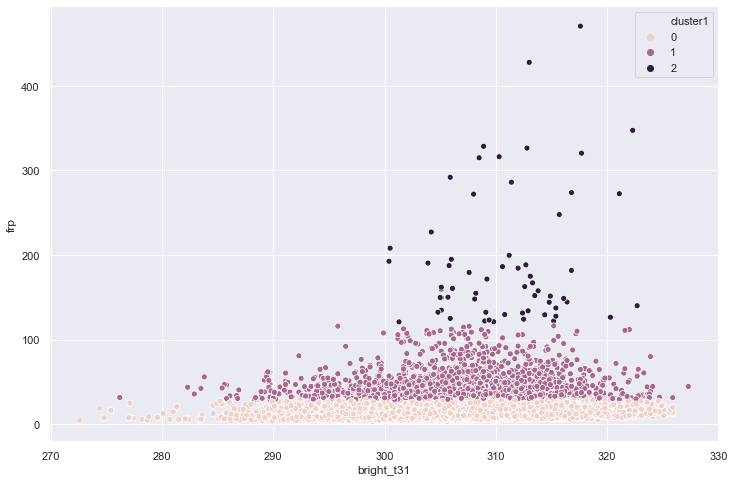

In [205]:
sns.scatterplot(x = 'bright_t31', y = 'frp', hue = 'cluster1', data=df)
sns.set(rc={'figure.figsize': (8,12)})

Text(0.5, 1.0, 'Clustered Fire Dataset')

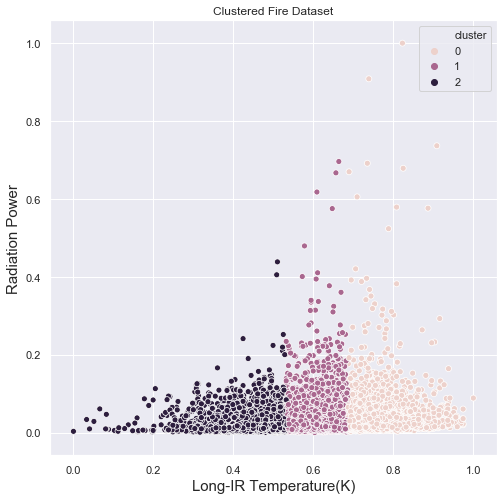

In [49]:
sns.scatterplot(x = 'bright_t31*', y = 'frp*', hue = 'cluster', data=df1)
sns.set(rc={'figure.figsize': (8,8)})
plt.xlabel('Long-IR Temperature(K)', fontsize=15)
plt.ylabel('Radiation Power', fontsize=15)
plt.title('Clustered Fire Dataset')

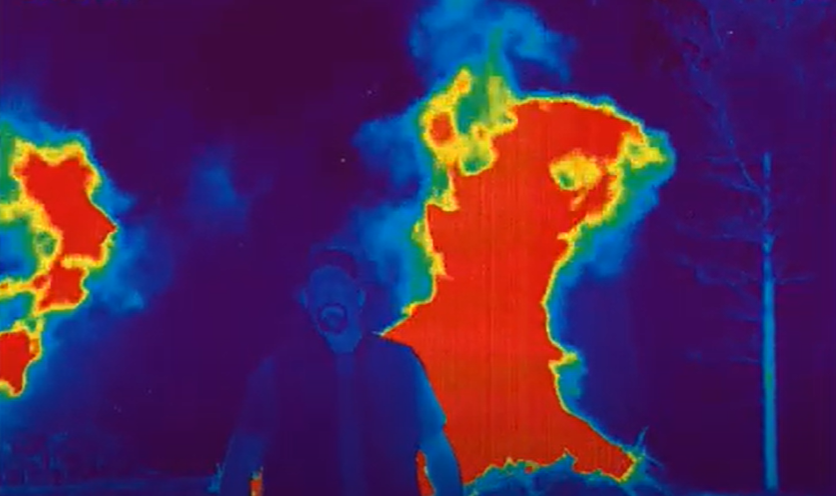

In [35]:
from IPython.display import Image
Image(r"C:\Users\laptop\Downloads\Ir_fire.png")

# This is a 'Thermal Image' which is collected from internet will help us to understand the difference between'Smoke' and 'Fire' 

In [38]:
# Based on the above image we can conclude that:

# (i) The Human body's temperature is much compareble to that of the smoke, as of the image above.
#     That means the smoke's temperature should lie in the range of (300-311)K with some factual error.
#     Thus, 2nd Cluster (k = 1) will be most probably the 'Smoke'.

# (ii) If viewed from the prospective of Radiant Power, the normal fire will have high intensity of radiation, but very small
#      covered area. So, we have to consider only hight 'radiant flux' along with high 'radiant power' of emmision. Keeping this
#      in mind we can put 'Agricultural Buring' in the 3rd Cluster (k = 2). The 'Forest Fire' might overlap with this and can
#      go higher band of 'temperature'.

# (iii) The 1st Cluster (k = 0), might be containing moisture from the atmosphere. This can be also treated as 'noise'.

In [16]:
df2 = df1.copy()
df2.drop(['daynight','type'],axis=1,inplace=True)

In [17]:
df2.head()

,fireID,brightness,scan,track,confidence,bright_t31,frp,bright_t31*,frp*,cluster
0,0,318.6,1.0,1.0,69,302.6,7.7,0.548446,0.009632,1
1,1,317.0,1.1,1.0,69,302.0,9.3,0.537477,0.013057,1
2,2,317.2,2.5,1.5,53,300.0,29.3,0.500914,0.055865,2
3,3,316.8,2.5,1.5,57,300.8,27.5,0.515539,0.052012,2
4,4,324.6,2.1,1.4,77,303.7,44.0,0.568556,0.087329,1


In [18]:
df1.head()

,fireID,brightness,scan,track,confidence,bright_t31,frp,daynight,type,bright_t31*,frp*,cluster
0,0,318.6,1.0,1.0,69,302.6,7.7,D,0,0.548446,0.009632,1
1,1,317.0,1.1,1.0,69,302.0,9.3,D,0,0.537477,0.013057,1
2,2,317.2,2.5,1.5,53,300.0,29.3,D,0,0.500914,0.055865,2
3,3,316.8,2.5,1.5,57,300.8,27.5,D,0,0.515539,0.052012,2
4,4,324.6,2.1,1.4,77,303.7,44.0,D,0,0.568556,0.087329,1


In [26]:
df1['class'] = df.apply(lambda _: '', axis=1)

In [28]:
import sys
pd.options.mode.chained_assignment = None  # default='warn'

In [29]:
for i,j in df1.iterrows():
    if j['cluster'] == 2:
        df1['class'][i] = 1
        #print(j['cluser'])
        #print(j['class'])
    elif  j['cluster'] != 2:
        df1['class'][i] = 0
        

In [42]:

df2 = df1[['fireID','class']]


In [39]:
df2.head()
df2.to_csv('Final_Task-2.csv')

In [44]:
df2.to_json('Final_Task-2.json')